(stability-functions-section)=
# Stability functions

To examine the behaviour of the local truncation errors we use the following test equation

```{math}
:label: test-equation

y' = \lambda y.
```

This test equation is chosen as it is a simple ODE which has the solution $y=e^{\lambda t}$. Over a single step of a Runge-Kutta method, the values of $y_{n+1}$ are updated using the values of $y_n$ so the values of $\tau_{n+1}$ are also updated using $\tau_n$ by the same method. This allows us to define a **stability function** for a method.

````{admonition} Definition: stability function
:class: note
:name: stability-function-definition

The **stability function** of a method, denoted by $R(z)$, is the rate of growth over a single step of the method when applied to calculate the solution of an ODE of the form $y'=\lambda t$ where $z = h \lambda$ and $h$ is the step size

\begin{align*}
    y_{n+1} &= R(z)y_n.
\end{align*}
````

For example, if the Euler method is used to solve the test equation then the solution will be updated over one step using

\begin{align*}
    y_{n+1} =y_n + h f(t_n ,y_n) = y_n + h \lambda y_n,
\end{align*}

Let $z = h\lambda$ then 

\begin{align*}
    y_{n+1} &= y_n + z y_n =(1+z)y_n.
\end{align*}

So the stability function of the Euler method is $R(z) = 1 + z$.

(absolute-stability-section)=
## Absolute stability

We have seen that a necessary [condition for stability](stability-definition) of a method is that the local truncation errors must not grow from one step to the next. A method satisfying this basic condition is considered to be **absolutely stable**. Since the stability function $R(z)$ is expressed using $z=h\lambda$ then a method may be stable for some value of $h$ and unstable for others. This provides the definition for absolute stability.

````{admonition} Definition: absolute stability
:class: note
:name: absolute-stability-definition

A method is considered to be **absolutely stable** if $|R(z)| \leq 1$ for $z\in \mathbb{C}$.
````

Of course we require our methods to be stable so it is useful to know for what values of $h$ we have a stable method. This gives the definition of the **region of absolute stability**.

````{admonition} Definition: region of absolute stability
:class: note
:name: region-of-absolute-stability-definition

The **region of absolute stability** is the set of $z\in \mathbb{C}$ for which a method is absolutely stable

\begin{align*}
    \{ z:z\in \mathbb{C},|R(z)|\leq 1 \} 
\end{align*}

In other words all of the values of $z$ for which the method is absolutely stable.
````

(plot-stability-region-section)=
## Plotting stability regions

We can plot the region of absolute stability by generate a set of points for $z$ in the complex plane and plot the contour where $|R(z)| = 1$ which is the boundary of the stability region. The code for producing a plot of the region of absolute stability of the Euler method using Python is shown below.

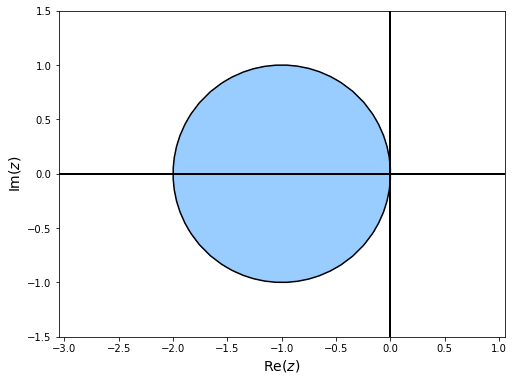

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
X, Y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
Z = X + Y * 1j

# Define stability function
R = 1 + Z

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis("equal")
plt.axis([-3, 1, -1.5, 1.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()

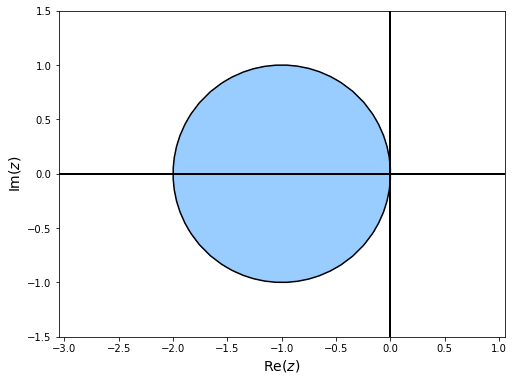

In [2]:
from myst_nb import glue
glue("euler_stability_region", fig, display=False)

:::{glue:figure} euler_stability_region
:name: euler-stability-region-figure

The region of absolute stability for the Euler method.
:::

(interval-of-absolute-stability-section)=
## Interval of absolute stability

The choice of step length used in a method will depend on accuracy requirements, the computational resources available, the stability properties of the method and the ODE being solved. It is often necessary to use as large a value of the step length as possible permitted by the stability requirements to minimise the computational effort required to solve an ODE. The range values of the step length that can be chosen is governed by the stability region and provides use with the following definition.

````{admonition} Definition: Interval of absolute stability
:class: note
:name: interval-of-absolute-stability-definition

The range of real values that the step length $h$ of a method can take that ensures a method remains absolutely stable is known as the **interval of absolute stability**

\begin{align*}
    \{ z : z \in \mathbb{R}, |R(z)| \leq 1 \}
\end{align*}

````

The interval of absolute stability for the Euler method can be seen in {numref}`interval-of-absolute-stability-figure`. 

```{glue:figure} interval_of_absolute_stability_plot
:name: interval-of-absolute-stability-figure

Interval of absolute stability for the Euler method.
```

The region of absolute stability for the Euler method shows that the interval of absolute stability for the test ODE $y'=\lambda y$ is

\begin{align*}
    z \in [-2,0],
\end{align*}

Since $z = h\lambda$ then

\begin{align*}
    h \in \left[ -\frac{2}{\lambda},0 \right],
\end{align*}

so we have the condition

\begin{align*}
    h \leq -\frac{2}{\lambda}.
\end{align*}

We saw in {numref}`stiff-solution-1` that solving the ODE $y' = -15y$ using $h=0.25$ resulted in an unstable solution whereas using $h=0.125$ resulted in a stable (albeit inaccurate) solution. This is because for this ODE $\lambda = -15$ and the step length for the Euler method must satisfy
\begin{align*}
    h \leq -\frac{2}{-15} = 0.1\dot{3}.
\end{align*}

This is why the solution using $h=0.25$ was stable since $0.25 < 0.1\dot{3}$ and the solution using $h=0.125$ was unstable since $0.125 < 0.1\dot{3}$.

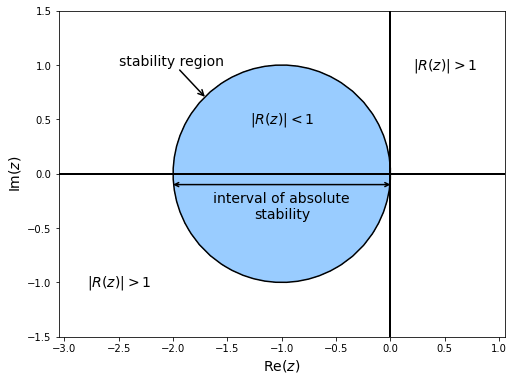

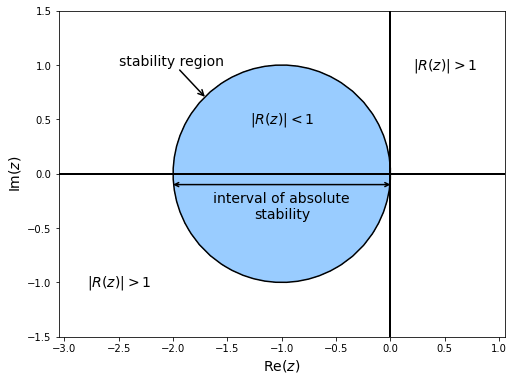

In [3]:
# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis("equal")
plt.axis([-3, 1, -1.5, 1.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.annotate("", xy=(-2, -0.1), xytext=(0, -0.1), arrowprops=dict(arrowstyle="<->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("stability region", xy=(-1+np.cos(0.75*np.pi), np.sin(0.75*np.pi)), xytext=(-2.5, 1), fontsize=14, 
             arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.text(-1, -0.3, "interval of absolute\nstability", fontsize=14, ha="center", va="center")
plt.text(-1, 0.5, "$|R(z)| < 1$", fontsize=14, ha="center", va="center")
plt.text(0.5, 1, "$|R(z)| > 1$", fontsize=14, ha="center", va="center")
plt.text(-2.5, -1, "$|R(z)| > 1$", fontsize=14, ha="center", va="center")
plt.show()

from myst_nb import glue
glue("interval_of_absolute_stability_plot", fig, display=False)